# Step 1: Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option("display.max_columns",None)

# Step 2: Import Data

In [2]:
df = pd.read_csv('Mobile_data.csv',
                          header=0)
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [3]:
df.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

# Step 3: EDA

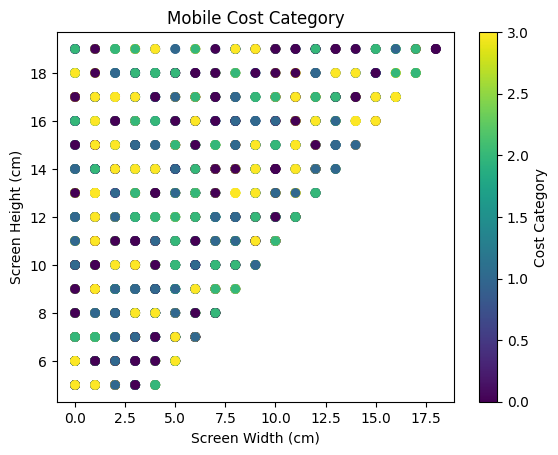

In [4]:
plt.scatter(df['sc_w'], df['sc_h'], c=df['price_range'], cmap='viridis')

# Add labels and title
plt.xlabel('Screen Width (cm)')
plt.ylabel('Screen Height (cm)')
plt.title('Mobile Cost Category')

# Add a colorbar legend for the cost category
cbar = plt.colorbar()
cbar.set_label('Cost Category')

# Display the plot
plt.show()

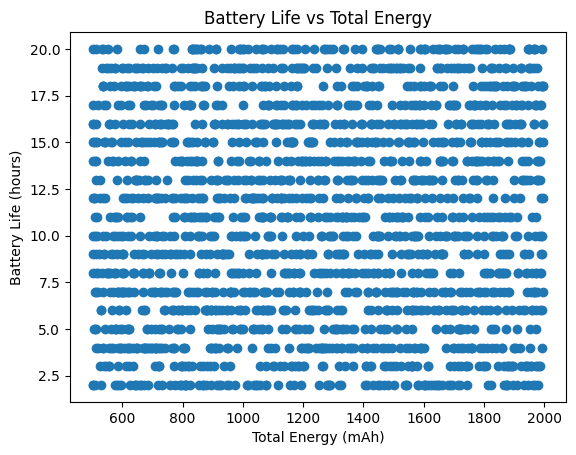

In [5]:
plt.scatter(df['battery_power'], df['talk_time'])

# Add labels and title
plt.xlabel('Total Energy (mAh)')
plt.ylabel('Battery Life (hours)')
plt.title('Battery Life vs Total Energy')

# Display the plot
plt.show()

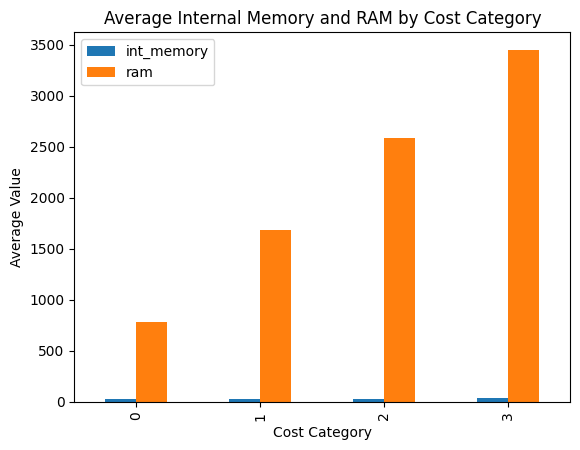

In [6]:
# Grouped bar plot
df_grouped = df.groupby('price_range').mean()[['int_memory', 'ram']]
df_grouped.plot(kind='bar')

# Add labels and title
plt.xlabel('Cost Category')
plt.ylabel('Average Value')
plt.title('Average Internal Memory and RAM by Cost Category')

# Display the plot
plt.show()

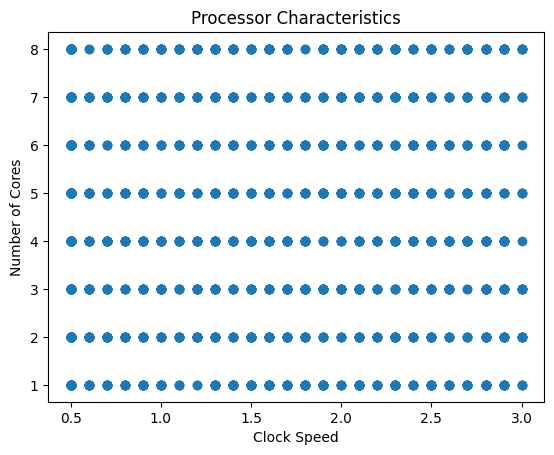

In [7]:
plt.scatter(df['clock_speed'], df['n_cores'])

# Add labels and title
plt.xlabel('Clock Speed')
plt.ylabel('Number of Cores')
plt.title('Processor Characteristics')

# Display the plot
plt.show()

# Step 4 -DATA Preprocessing

In [8]:
df_rev = pd.DataFrame.copy(df)

In [9]:
df_rev.shape

(2000, 15)

# Checking missing values

In [10]:
def check_missing_values(data): # there is a missing values
    """
    Objective: Check missing values count and percentage in all columns

    data: input data frame
    return: Missing Values data Frame

    """
    total = data.isnull().sum().sort_values(ascending=False)
    per = (data.isnull().sum()/data.isnull().count() * 100).sort_values(ascending=False)
    missing_data = pd.concat([total,per],axis=1,keys=['Total','Percent'])
    return missing_data

In [11]:
check_missing_values(df_rev)

,Total,Percent
battery_power,0,0.0
clock_speed,0,0.0
fc,0,0.0
int_memory,0,0.0
m_dep,0,0.0
mobile_wt,0,0.0
n_cores,0,0.0
pc,0,0.0
px_height,0,0.0
px_width,0,0.0


In [13]:
df_rev.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [14]:
X = df[['battery_power','clock_speed', 'int_memory','n_cores','ram','talk_time']]
y = df['price_range']

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,
                                                random_state = 10)

In [16]:
#predicting using the KNeighbors_Regressor

from sklearn.neighbors import KNeighborsRegressor

model_KNN = KNeighborsRegressor(n_neighbors = 3, metric="euclidean")

#fit the model on the data and predict the values

model_KNN.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)

In [17]:
y_pred

array([3.        , 2.33333333, 1.        , 3.        , 1.        ,
       3.        , 3.        , 3.        , 1.33333333, 3.        ,
       2.33333333, 3.        , 0.        , 1.33333333, 0.        ,
       3.        , 1.33333333, 3.        , 2.33333333, 2.33333333,
       3.        , 2.33333333, 0.        , 1.        , 0.        ,
       0.        , 2.33333333, 3.        , 1.33333333, 0.        ,
       2.        , 0.        , 3.        , 2.66666667, 2.        ,
       2.        , 1.        , 1.        , 2.66666667, 0.        ,
       3.        , 2.        , 2.        , 0.        , 0.        ,
       3.        , 1.33333333, 0.33333333, 1.        , 2.        ,
       1.        , 2.66666667, 2.33333333, 2.        , 3.        ,
       3.        , 2.33333333, 3.        , 1.        , 0.        ,
       1.33333333, 1.66666667, 0.        , 0.        , 3.        ,
       0.        , 1.        , 0.        , 2.        , 2.66666667,
       3.        , 1.66666667, 0.        , 1.        , 3.     

In [18]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print(r2)
print(mse)


0.854697361848976
0.1748148148148148


In [19]:
min(y_test), max(y_test)

(0, 3)

In [20]:
acc_dict = dict()
for K in range(1, 50):

    # Create object with K values
    model_KNN = KNeighborsRegressor(n_neighbors=K, metric= "euclidean")

    #Model Fit
    model_KNN.fit(X_train, y_train)

    #model prediction
    y_pred = model_KNN.predict(X_test)
    r2 = r2_score(y_test,y_pred)

    #Print accuracy score
    print("Accuracy is: {} for K-Value: {}".format(r2,K))
    acc_dict[K] =r2

Accuracy is: 0.7922049136611417 for K-Value: 1
Accuracy is: 0.8410367589507733 for K-Value: 2
Accuracy is: 0.854697361848976 for K-Value: 3
Accuracy is: 0.8666648195992326 for K-Value: 4
Accuracy is: 0.872219874907358 for K-Value: 5
Accuracy is: 0.8772469767738966 for K-Value: 6
Accuracy is: 0.8814013078651005 for K-Value: 7
Accuracy is: 0.8828122294334814 for K-Value: 8
Accuracy is: 0.8813430198338272 for K-Value: 9
Accuracy is: 0.8840087828056493 for K-Value: 10
Accuracy is: 0.8847681793939058 for K-Value: 11
Accuracy is: 0.8854914392272486 for K-Value: 12
Accuracy is: 0.885610239453303 for K-Value: 13
Accuracy is: 0.885663227493071 for K-Value: 14
Accuracy is: 0.8859374290514462 for K-Value: 15
Accuracy is: 0.8864107641317975 for K-Value: 16
Accuracy is: 0.8865395687741459 for K-Value: 17
Accuracy is: 0.8876709360433233 for K-Value: 18
Accuracy is: 0.8874644745711291 for K-Value: 19
Accuracy is: 0.8872815554154863 for K-Value: 20
Accuracy is: 0.8879445756631934 for K-Value: 21
Accur

In [21]:
# This will return maximum accuracy with k value
for k in acc_dict:
    if acc_dict[k] == max(acc_dict.values()):
        print(k,":", acc_dict[k])

48 : 0.8925670543199444


Taking K value as 49 because we always take odd value for K

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the KNN regressor with a specified number of neighbors
k = 49
regressor = KNeighborsRegressor(n_neighbors=k)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score: ", r2)


Mean Squared Error (MSE):  0.12952380952380954
R-squared (R2) Score:  0.8923423552682486
